In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('headbrain.csv')

In [3]:
df.shape

(237, 4)

In [4]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

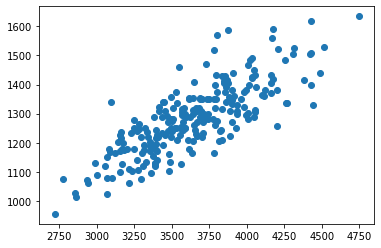

In [6]:
plt.scatter(X,y)
plt.show()

In [7]:
mean_x = np.mean(X)
mean_y = np.mean(y)

In [8]:
numer = 0
denom = 0
n = len(X)

for i in range(n):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
slope = numer / denom
intercept = mean_y - slope * mean_x

In [9]:
slope, intercept

(0.26342933948939945, 325.57342104944223)

In [10]:
predictions = []
for i in range(n):
    y_pred = slope * X[i] + intercept
    predictions.append(int(y_pred))

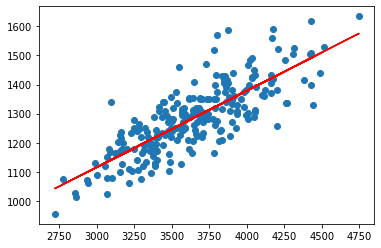

In [11]:
plt.scatter(X,y)
plt.plot(X, predictions, 'red')
plt.show()

In [12]:
predictions[:10]

[1514, 1310, 1448, 1320, 1425, 1269, 1322, 1263, 1277, 1374]

In [13]:
y[:10]

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375],
      dtype=int64)

In [14]:
# Mean Squared Error
error = 0
for i in range(n):
    error += (predictions[i] - y[i]) ** 2
    
mse = error/n
# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Mean Squared Error",mse)
print("Root Mean Squared Error",rmse)

Mean Squared Error 5202.9029535864975
Root Mean Squared Error 72.13115106239812


In [15]:
# Data Preprocessing
# - Feature Scaling (Standardization/Normalization)
# - Label Encoding
# - Handle Missing Values
# - Train Test Split

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
# scikit-learn

In [18]:
scaler = StandardScaler()

In [20]:
new_x = X.reshape((-1,1))
new_x = scaler.fit_transform(new_x)

In [21]:
new_y = y.reshape((-1,1))
new_y = scaler.fit_transform(new_y)

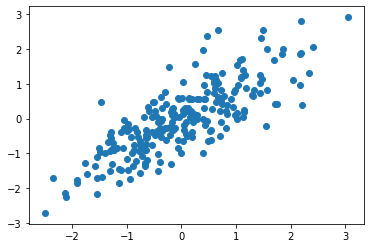

In [22]:
plt.scatter(new_x, new_y)
plt.show()

In [25]:
def gradientDescent(x,y,epochs,alpha):
    slope = 0
    inter = 0
    for i in range(epochs):
        y_pred = slope * x + inter
        loss = y_pred - y
        grad_slope = (2/n) * np.dot(loss.T,x)
        grad_inter = (2/n) * sum(loss)
        slope = slope - alpha * grad_slope
        inter = inter - alpha * grad_inter
        
    return slope, inter

In [36]:
alpha = 0.01
epochs = 1000
slope, intercept = gradientDescent(new_x, new_y, epochs, alpha)

In [37]:
slope, intercept

(array([[0.79956971]]), array([-3.2857917e-16]))

In [38]:
slope = slope[0][0]
intercept = intercept[0]

In [39]:
slope, intercept

(0.7995697079086465, -3.285791704356865e-16)

In [40]:
predictions = []
for i in range(n):
    y_pred = slope * new_x[i] + intercept
    predictions.append(y_pred)

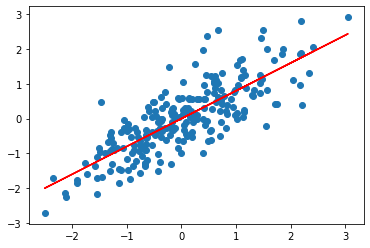

In [41]:
plt.scatter(new_x,new_y)
plt.plot(new_x, predictions, 'red')
plt.show()

In [42]:
# Mean Squared Error
error = 0
for i in range(n):
    error += (predictions[i] - new_y[i]) ** 2
    
mse = error/n
# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Mean Squared Error",mse)
print("Root Mean Squared Error",rmse)

Mean Squared Error [0.36068828]
Root Mean Squared Error [0.60057329]
